In [33]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .appName("LinearRegressionVisualization") \
    .getOrCreate()

data = [
    ('USA', 21.43e12, 79.5, 331002651, 99.0),
    ('China', 14.34e12, 76.9, 1439323776, 87.6),
    ('India', 2.87e12, 69.4, 1380004385, 74.0),
    ('Germany', 4.38e12, 81.2, 83783942, 100.0),
    ('Japan', 5.08e12, 84.6, 126476461, 99.4),
    ('Russia', 1.57e12, 72.8, 145934462, 99.0),
    ('Brazil', 2.05e12, 75.2, 212559417, 86.0),
    ('South Africa', 0.35e12, 64.1, 59308690, 73.0),
    ('Australia', 1.37e12, 82.9, 25499884, 99.0),
    ('Mexico', 1.22e12, 75.4, 128932753, 90.0),
    ('Canada', 1.64e12, 80.5, 37742154, 99.9),
    ('UK', 2.83e12, 81.4, 67886011, 99.0),
    ('France', 2.78e12, 82.0, 65273511, 100.0),
    ('South Korea', 1.62e12, 83.1, 51269185, 99.9),
    ('Argentina', 0.45e12, 76.4, 45195774, 95.0),
    ('Nigeria', 0.58e12, 64.3, 206139589, 64.0),
    ('Egypt', 0.39e12, 68.0, 104258322, 77.0),
    ('Thailand', 0.45e12, 72.3, 69799978, 93.0),
    ('Chile', 0.55e12, 80.2, 19116201, 95.0),
    ('Colombia', 0.56e12, 78.9, 50882891, 94.0),
    ('Turkey', 0.37e12, 76.6, 84339067, 96.0),
    ('Italy', 2.12e12, 81.0, 60461826, 99.0),
    ('Spain', 1.43e12, 82.5, 46719178, 99.0),
    ('Poland', 0.56e12, 77.3, 37846611, 99.0),
    ('South Korea', 1.62e12, 83.1, 51269185, 99.9),
    ('Sweden', 0.55e12, 82.2, 10099265, 100.0),
    ('Belgium', 0.51e12, 81.7, 11589623, 99.0),
    ('Netherlands', 0.91e12, 81.0, 17134872, 100.0),
    ('Singapore', 0.37e12, 82.8, 5697926, 100.0),
    ('Saudi Arabia', 0.78e12, 75.0, 34813871, 77.0),
    ('Pakistan', 0.31e12, 67.4, 220892340, 62.0),
    ('Bangladesh', 0.33e12, 73.5, 164689383, 74.0),
    ('Vietnam', 0.33e12, 75.9, 97338579, 84.0),
    ('Malaysia', 0.37e12, 77.9, 32365999, 82.0),
    ('Indonesia', 0.52e12, 72.6, 273523615, 79.0),
    ('Philippines', 0.39e12, 70.4, 109581078, 75.0),
    ('Vietnam', 0.34e12, 75.0, 97338579, 84.0)
]

columns = ['Country', 'GDP', 'LifeExpectancy', 'Population', 'EducationIndex']
df = spark.createDataFrame(data, columns)

In [34]:
features = ['GDP', 'Population', 'EducationIndex']
assembler = VectorAssembler(inputCols=features, outputCol='features')
df = assembler.transform(df)

scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(df)
scaled_df = scaler_model.transform(df)

train_data, test_data = scaled_df.randomSplit([0.8, 0.2], seed=1234)

lr = LinearRegression(featuresCol='scaled_features', labelCol='LifeExpectancy')
model = lr.fit(train_data)

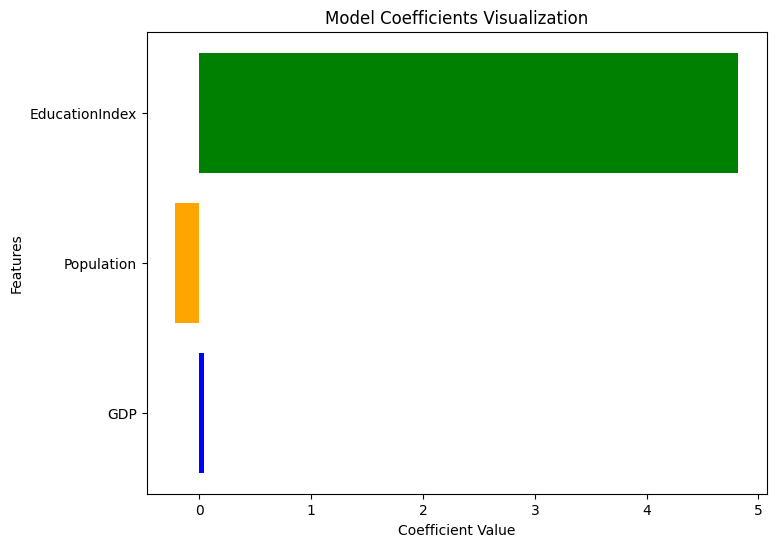

Model Coefficients:  [ 0.03674995 -0.22058145  4.8217771 ]
Model Intercept:  76.71209478481065


In [35]:
coefficients = model.coefficients.toArray()
intercept = model.intercept

plt.figure(figsize=(8, 6))
plt.barh(features, coefficients, color=['blue', 'orange', 'green'])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Model Coefficients Visualization')
plt.show()

print("Model Coefficients: ", coefficients)
print("Model Intercept: ", intercept)

The intercept represents the predicted Life Expectancy when all the features (GDP, Population, and Education Index) are set to zero.

Coefficients:

* GDP has a slightly positive impact on life expectancy, meaning wealthier countries generally have slightly higher life expectancies.

* Population size has a slightly negative effect, which may reflect the challenges larger populations face, such as resource constraints or overburdened healthcare systems.

* Education Index has the strongest positive effect, highlighting the importance of education in improving health outcomes and increasing life expectancy.